# Entrega Final ML

In [13]:
%pip install pandas
%pip install numpy
%pip install scikit-learn
%pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Importar dependencias 


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
# from ydata_profiling import ProfileReport


In [15]:
# leemos el cvs
data = pd.read_csv('/Users/saramiranda/Desktop/ML_Binary_Classification_Expr/database/grammatical_facial_expressions.csv')

In [16]:
data.head()

,video_id,user,expression,frame,0,target
0,a_affirmative,a,affirmative,0,0.0 0x 0y 0z 1x 1y 1z 2x 2y 2z 3x 3y 3z 4x 4y ...,0.0
1,a_affirmative,a,affirmative,1,1390385453.172 244.672 208.182 895 240.949 205...,0.0
2,a_affirmative,a,affirmative,2,1390385453.313 265.953 195.731 1016 262.556 19...,0.0
3,a_affirmative,a,affirmative,3,1390385453.375 272.755 192.786 1060 269.481 19...,0.0
4,a_affirmative,a,affirmative,4,1390385453.531 281.89 190.533 1129 278.861 188...,0.0


# Verificar las columnas del dataset
print("Columnas del dataset:")
print(data.columns.tolist())
print(f"\nShape: {data.shape}")

In [17]:
# Verificar las columnas del dataset
print("Columnas del dataset:")
print(data.columns.tolist())
print(f"\nShape: {data.shape}")
print(f"\nPrimeras filas de la columna '0':")
print(data['0'].head())
print(f"\nTipo de dato en columna '0': {type(data['0'].iloc[0])}")

Columnas del dataset:
['video_id', 'user', 'expression', 'frame', '0', 'target']

Shape: (26641, 6)

Primeras filas de la columna '0':
0    0.0 0x 0y 0z 1x 1y 1z 2x 2y 2z 3x 3y 3z 4x 4y ...
1    1390385453.172 244.672 208.182 895 240.949 205...
2    1390385453.313 265.953 195.731 1016 262.556 19...
3    1390385453.375 272.755 192.786 1060 269.481 19...
4    1390385453.531 281.89 190.533 1129 278.861 188...
Name: 0, dtype: object

Tipo de dato en columna '0': <class 'str'>


Parseando landmarks...
Longitudes de landmarks: min=1, max=301
Distribución de longitudes:
0
301    26607
1         17
Name: count, dtype: int64

Usando solo filas con 301 landmarks
Filas válidas: 26607 de 26624

Número de muestras: 26607
Número de características: 301
Clases únicas: [0. 1.]


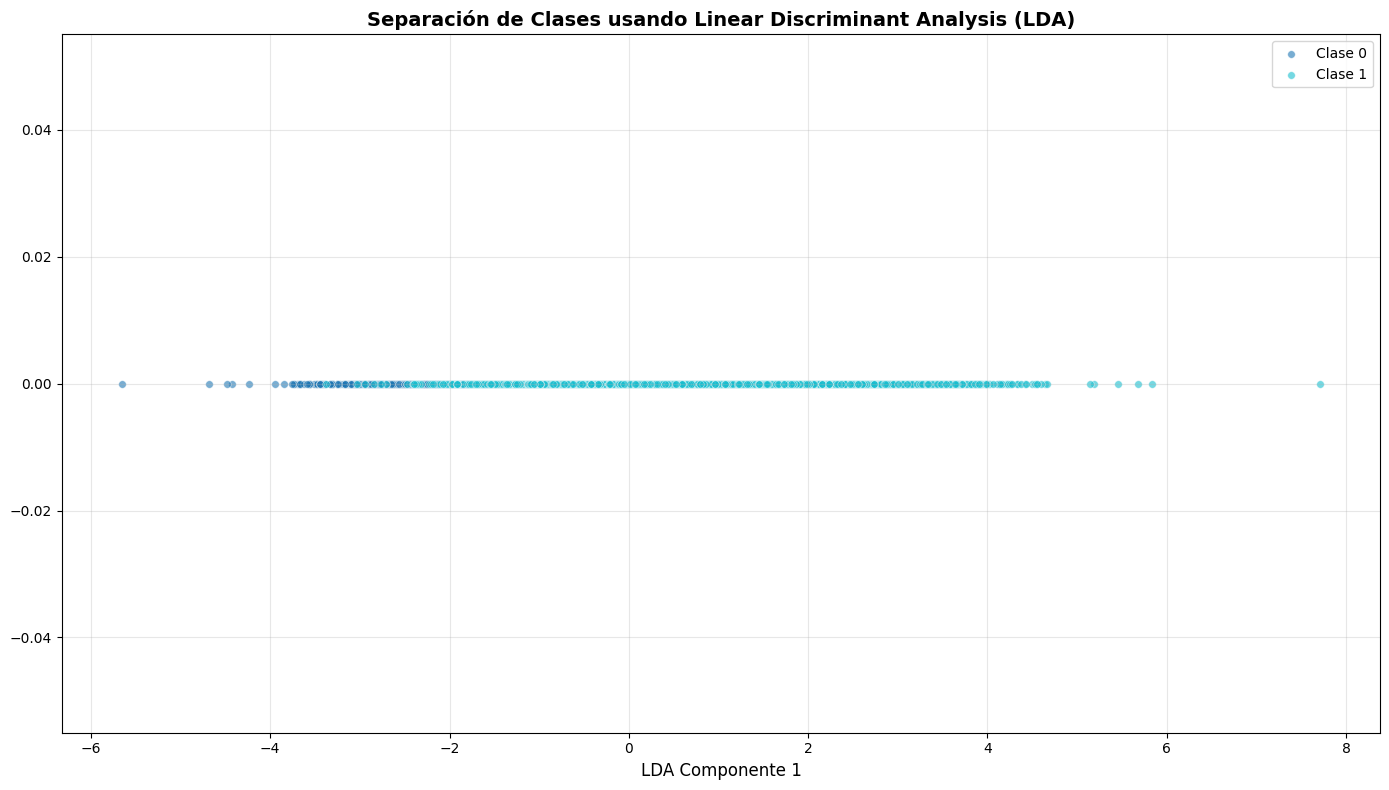


Varianza explicada por componente: [1.]
Varianza total explicada: 1.0000
Total de clases: 2


In [18]:
# using LDA to see the separation of classes
%matplotlib inline

# Primero, parseamos la columna '0' que contiene los landmarks
def parse_landmarks(landmark_str):
    """Convierte el string de landmarks en una lista de valores numéricos"""
    parts = str(landmark_str).split()
    # Filtramos solo los valores numéricos (ignoramos los headers como '0x', '0y', etc.)
    numeric_values = []
    for part in parts:
        try:
            numeric_values.append(float(part))
        except ValueError:
            continue
    return numeric_values

# Parseamos los landmarks y filtramos NaN en target
print("Parseando landmarks...")
data_clean = data[data['target'].notna()].copy()
landmarks_parsed = data_clean['0'].apply(parse_landmarks)

# Verificar que todos tengan la misma longitud
lengths = landmarks_parsed.apply(len)
print(f"Longitudes de landmarks: min={lengths.min()}, max={lengths.max()}")
print(f"Distribución de longitudes:")
print(lengths.value_counts().head())

# Filtrar solo las filas que tienen la longitud más común (301)
expected_length = lengths.mode()[0]
mask_valid = lengths == expected_length
data_clean_filtered = data_clean[mask_valid].copy()
landmarks_parsed_filtered = landmarks_parsed[mask_valid]

print(f"\nUsando solo filas con {expected_length} landmarks")
print(f"Filas válidas: {mask_valid.sum()} de {len(mask_valid)}")

# Convertir a array numpy
X = np.array(landmarks_parsed_filtered.tolist())
y = data_clean_filtered['target'].values

print(f"\nNúmero de muestras: {X.shape[0]}")
print(f"Número de características: {X.shape[1]}")
print(f"Clases únicas: {np.unique(y)}")

# Aplicar LDA para reducir a 2 componentes (para visualización)
n_components = min(2, len(np.unique(y))-1)
lda = LDA(n_components=n_components)
X_lda = lda.fit_transform(X, y)

# Crear el scatter plot
plt.figure(figsize=(14, 8))
colors = plt.cm.tab10(np.linspace(0, 1, len(np.unique(y))))

for idx, label in enumerate(np.unique(y)):
    mask = y == label
    plt.scatter(X_lda[mask, 0], X_lda[mask, 1] if n_components > 1 else np.zeros(mask.sum()),
                label=f'Clase {int(label)}', 
                alpha=0.6, 
                edgecolors='w', 
                linewidth=0.5, 
                s=30,
                color=colors[idx])

plt.xlabel('LDA Componente 1', fontsize=12)
if n_components > 1:
    plt.ylabel('LDA Componente 2', fontsize=12)
plt.title('Separación de Clases usando Linear Discriminant Analysis (LDA)', fontsize=14, fontweight='bold')
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nVarianza explicada por componente: {lda.explained_variance_ratio_}")
print(f"Varianza total explicada: {lda.explained_variance_ratio_.sum():.4f}")
print(f"Total de clases: {len(np.unique(y))}")

### ¿Qué hace LDA?

Linear Discriminant Analysis busca combinaciones lineales de las características que maximicen la separabilidad entre clases. Optimiza la razón entre la varianza **entre** clases y la varianza **dentro** de las clases, asumiendo que cada clase sigue una distribución normal con covarianza compartida. El resultado son ejes (componentes) donde las clases quedan lo más separadas posible; esto sirve tanto para clasificación lineal como para reducir la dimensionalidad a 1 o 2 dimensiones y visualizar la separación de clases.


# CONCLUSIÓN EDA

* Al ver los datos, podemos ver que son datos limpios de la captura de las expresiones de dos personas, esto con sus respectivos frames y coordenadas, no parecer haber datos faltantes por lo que se puede concluir que este set de datos nos sirve de manera organica para la generación de un modelo de classificación, porbaremos varios y veremos cual da mejores resultados

# MODELOS DE CLASIFICACIÓN

Vamos a entrenar varios modelos de clasificación y comparar su rendimiento para seleccionar el mejor.

### Función de verosimilitud logarítmica

Usamos la verosimilitud de una regresión logística para estimar parámetros que maximicen la probabilidad de las etiquetas observadas. Optimizar la log-verosimilitud (equivalente a minimizar la pérdida logística) produce estimadores de máxima verosimilitud para este modelo binario.


Split/escalado ya estaban definidos.


In [ ]:
from scipy.optimize import minimize

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def log_likelihood(theta, X, y):
    z = X @ theta
    p = sigmoid(z)
    eps = 1e-9  # evita log(0)
    return np.sum(y * np.log(p + eps) + (1 - y) * np.log(1 - p + eps))


def neg_log_likelihood(theta, X, y):
    return -log_likelihood(theta, X, y)


# Agregar término bias a los datos escalados
X_ll = np.hstack([np.ones((X_train_scaled.shape[0], 1)), X_train_scaled])
y_ll = y_train

# Tomar una muestra para acelerar la optimización
sample_size = min(5000, X_ll.shape[0])
X_sample = X_ll[:sample_size]
y_sample = y_ll[:sample_size]

# Estimación de máxima verosimilitud vía L-BFGS-B
theta0 = np.zeros(X_sample.shape[1])
res = minimize(neg_log_likelihood, theta0, args=(X_sample, y_sample), method="L-BFGS-B")

grad_norm = np.linalg.norm(res.jac) if hasattr(res, "jac") else float("nan")
print(f"Log-verosimilitud óptima: {-res.fun:.4f}")
print(f"Iteraciones: {res.nit}")
print(f"Norma del gradiente final: {grad_norm:.4f}")


Log-verosimilitud óptima: -2387.5792
Iteraciones: 45
Norma del gradiente final: 459.6049


In [20]:
# Preparar los datos para entrenamiento
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

# Usar los datos ya procesados (X, y de la celda anterior)
print(f"Datos para entrenamiento:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"Distribución de clases: {np.bincount(y.astype(int))}")

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalizar los datos (importante para algunos modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nDatos de entrenamiento: {X_train.shape}")
print(f"Datos de prueba: {X_test.shape}")

Datos para entrenamiento:
X shape: (26607, 301)
y shape: (26607,)
Distribución de clases: [17221  9386]

Datos de entrenamiento: (21285, 301)
Datos de prueba: (5322, 301)


In [21]:
# Definir los modelos a probar
modelos = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'LDA': LDA()
}

# Entrenar y evaluar cada modelo
resultados = []

print("Entrenando modelos...\n")
print("="*80)

for nombre, modelo in modelos.items():
    print(f"\n🔹 Entrenando {nombre}...")
    
    # Medir tiempo de entrenamiento
    start_time = time.time()
    
    # Algunos modelos funcionan mejor con datos escalados
    if nombre in ['SVM (Linear)', 'SVM (RBF)', 'K-Nearest Neighbors', 'Neural Network', 'LDA']:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    
    train_time = time.time() - start_time
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    resultados.append({
        'Modelo': nombre,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Tiempo (s)': train_time
    })
    
    print(f"   ✓ Accuracy: {accuracy:.4f}")
    print(f"   ✓ F1-Score: {f1:.4f}")
    print(f"   ✓ Tiempo: {train_time:.2f}s")

print("\n" + "="*80)
print(" Entrenamiento completado!")

# Crear DataFrame con resultados
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values('Accuracy', ascending=False)
print("\n📊 RESUMEN DE RESULTADOS:")
print(df_resultados.to_string(index=False))

Entrenando modelos...


🔹 Entrenando Random Forest...
   ✓ Accuracy: 0.9348
   ✓ F1-Score: 0.9060
   ✓ Tiempo: 3.13s

🔹 Entrenando SVM (Linear)...
   ✓ Accuracy: 0.8177
   ✓ F1-Score: 0.7075
   ✓ Tiempo: 127.60s

🔹 Entrenando SVM (RBF)...
   ✓ Accuracy: 0.8497
   ✓ F1-Score: 0.7684
   ✓ Tiempo: 35.47s

🔹 Entrenando K-Nearest Neighbors...
   ✓ Accuracy: 0.8557
   ✓ F1-Score: 0.7845
   ✓ Tiempo: 0.45s

🔹 Entrenando Naive Bayes...
   ✓ Accuracy: 0.6022
   ✓ F1-Score: 0.4865
   ✓ Tiempo: 0.07s

🔹 Entrenando Decision Tree...
   ✓ Accuracy: 0.8767
   ✓ F1-Score: 0.8275
   ✓ Tiempo: 4.66s

🔹 Entrenando Gradient Boosting...
   ✓ Accuracy: 0.8606
   ✓ F1-Score: 0.7868
   ✓ Tiempo: 111.24s

🔹 Entrenando AdaBoost...
   ✓ Accuracy: 0.7946
   ✓ F1-Score: 0.6721
   ✓ Tiempo: 41.75s

🔹 Entrenando Neural Network...
   ✓ Accuracy: 0.8957
   ✓ F1-Score: 0.8490
   ✓ Tiempo: 47.98s

🔹 Entrenando LDA...
   ✓ Accuracy: 0.8125
   ✓ F1-Score: 0.7008
   ✓ Tiempo: 0.46s

 Entrenamiento completado!

📊 RESUMEN DE

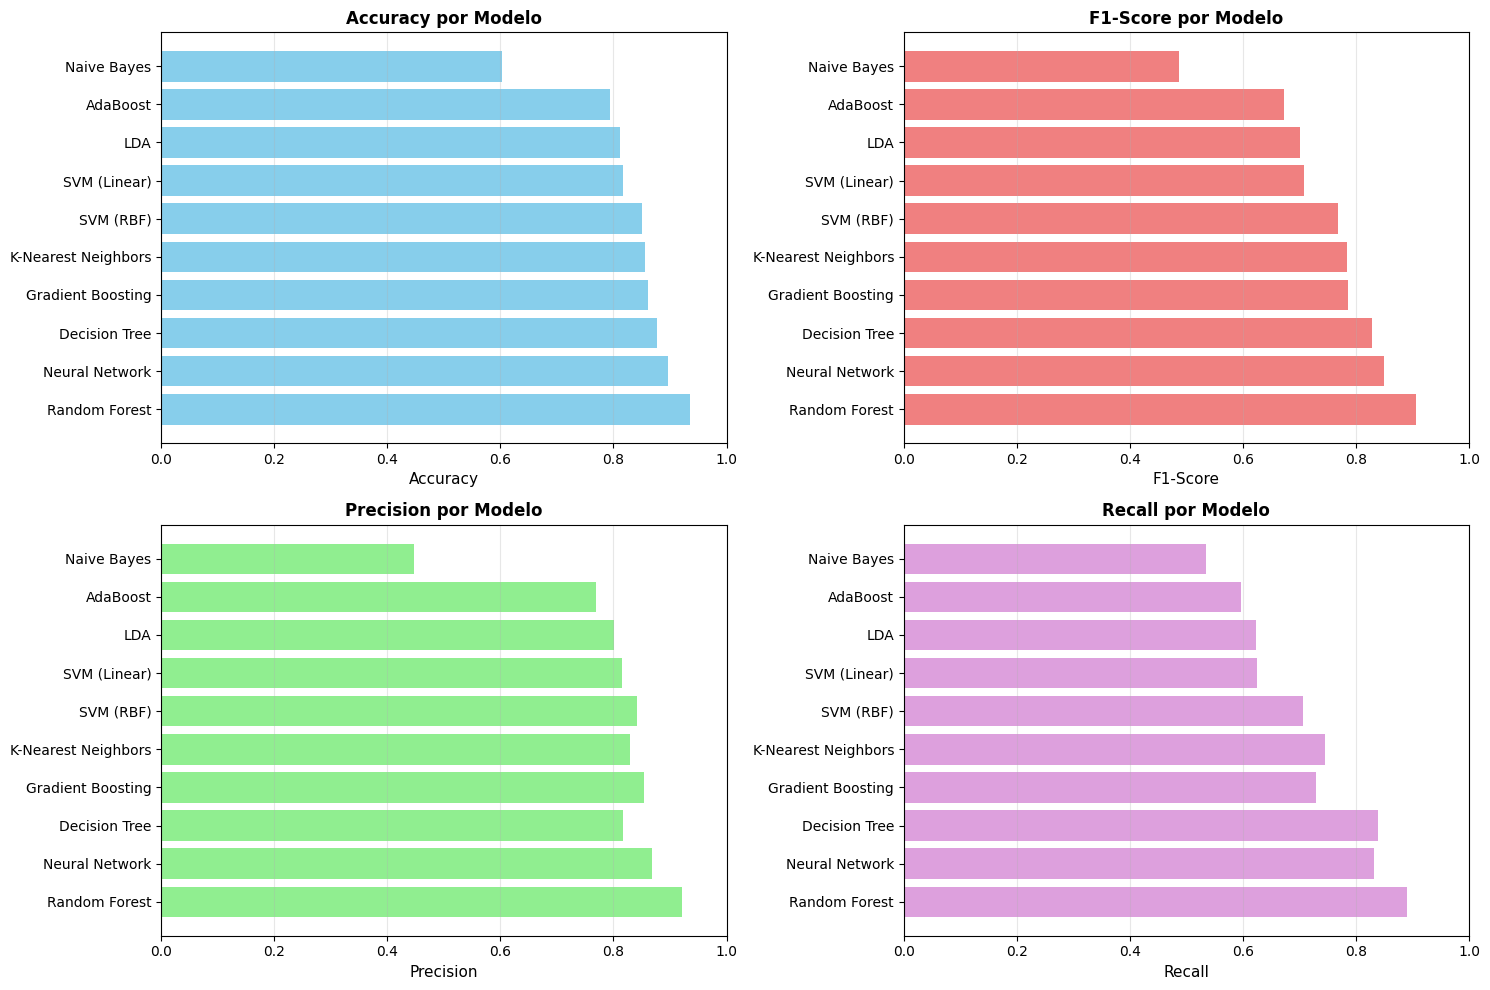

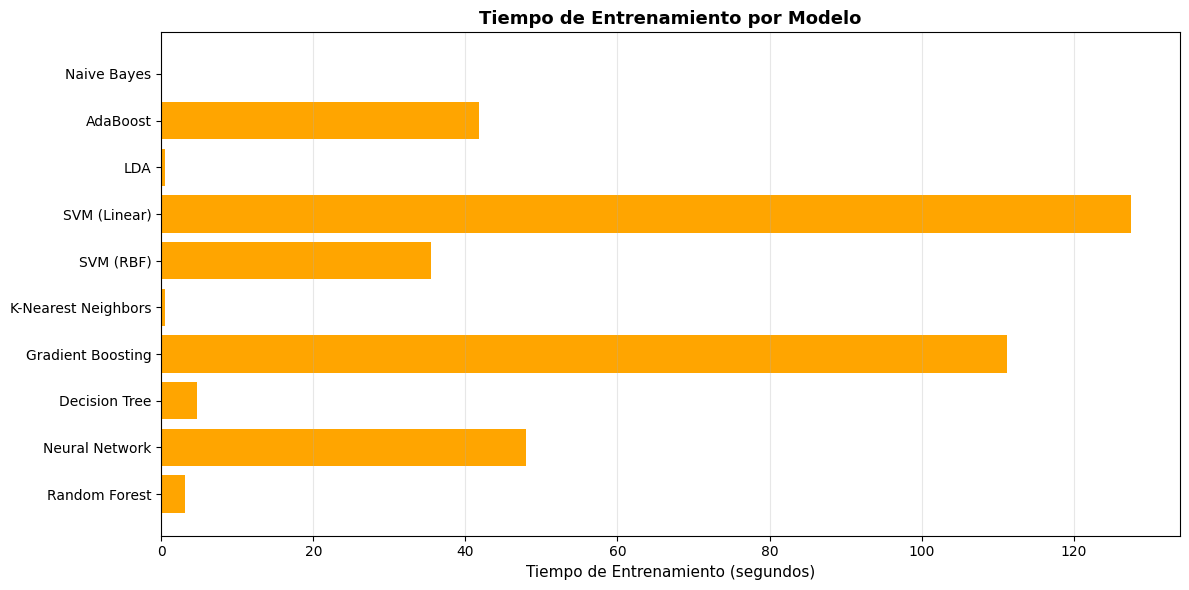

In [22]:
# Visualizar comparación de modelos
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Accuracy
axes[0, 0].barh(df_resultados['Modelo'], df_resultados['Accuracy'], color='skyblue')
axes[0, 0].set_xlabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Accuracy por Modelo', fontsize=12, fontweight='bold')
axes[0, 0].set_xlim(0, 1)
axes[0, 0].grid(axis='x', alpha=0.3)

# F1-Score
axes[0, 1].barh(df_resultados['Modelo'], df_resultados['F1-Score'], color='lightcoral')
axes[0, 1].set_xlabel('F1-Score', fontsize=11)
axes[0, 1].set_title('F1-Score por Modelo', fontsize=12, fontweight='bold')
axes[0, 1].set_xlim(0, 1)
axes[0, 1].grid(axis='x', alpha=0.3)

# Precision
axes[1, 0].barh(df_resultados['Modelo'], df_resultados['Precision'], color='lightgreen')
axes[1, 0].set_xlabel('Precision', fontsize=11)
axes[1, 0].set_title('Precision por Modelo', fontsize=12, fontweight='bold')
axes[1, 0].set_xlim(0, 1)
axes[1, 0].grid(axis='x', alpha=0.3)

# Recall
axes[1, 1].barh(df_resultados['Modelo'], df_resultados['Recall'], color='plum')
axes[1, 1].set_xlabel('Recall', fontsize=11)
axes[1, 1].set_title('Recall por Modelo', fontsize=12, fontweight='bold')
axes[1, 1].set_xlim(0, 1)
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfico de tiempo de entrenamiento
plt.figure(figsize=(12, 6))
plt.barh(df_resultados['Modelo'], df_resultados['Tiempo (s)'], color='orange')
plt.xlabel('Tiempo de Entrenamiento (segundos)', fontsize=11)
plt.title('Tiempo de Entrenamiento por Modelo', fontsize=13, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

🏆 Mejor modelo: Random Forest
   Accuracy: 0.9348
   F1-Score: 0.9060

 Modelo final entrenado con 26607 muestras


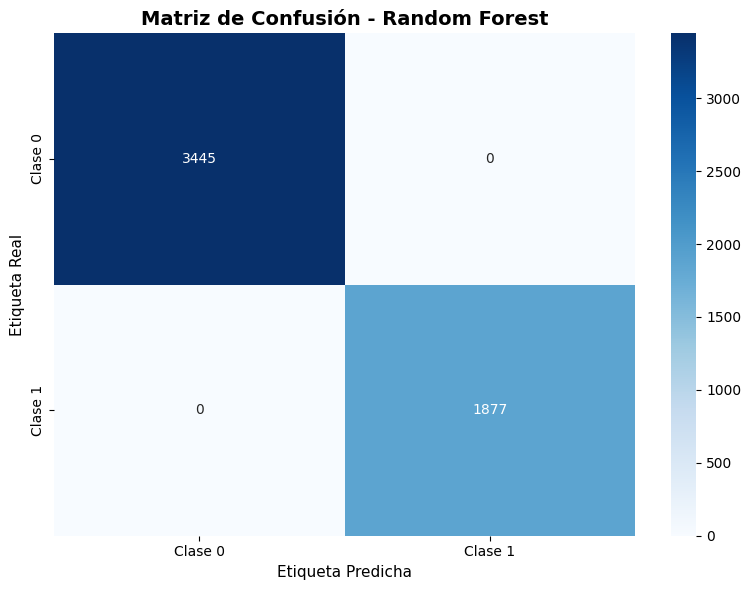


 REPORTE DE CLASIFICACIÓN DETALLADO:
              precision    recall  f1-score   support

     Clase 0       1.00      1.00      1.00      3445
     Clase 1       1.00      1.00      1.00      1877

    accuracy                           1.00      5322
   macro avg       1.00      1.00      1.00      5322
weighted avg       1.00      1.00      1.00      5322



In [ ]:
# Seleccionar el mejor modelo y entrenar con todos los datos
mejor_modelo_nombre = df_resultados.iloc[0]['Modelo']
print(f"🏆 Mejor modelo: {mejor_modelo_nombre}")
print(f"   Accuracy: {df_resultados.iloc[0]['Accuracy']:.4f}")
print(f"   F1-Score: {df_resultados.iloc[0]['F1-Score']:.4f}")

# Re-entrenar el mejor modelo con todos los datos
mejor_modelo = modelos[mejor_modelo_nombre]

if mejor_modelo_nombre in ['SVM (Linear)', 'SVM (RBF)', 'K-Nearest Neighbors', 'Neural Network', 'LDA']:
    scaler_final = StandardScaler()
    X_scaled_final = scaler_final.fit_transform(X)
    mejor_modelo.fit(X_scaled_final, y)
    usar_scaler = True
else:
    mejor_modelo.fit(X, y)
    scaler_final = scaler
    usar_scaler = False

print(f"\n Modelo final entrenado con {X.shape[0]} muestras")

# Matriz de confusión del mejor modelo en test set
if mejor_modelo_nombre in ['SVM (Linear)', 'SVM (RBF)', 'K-Nearest Neighbors', 'Neural Network', 'LDA']:
    y_pred_final = mejor_modelo.predict(X_test_scaled)
else:
    y_pred_final = mejor_modelo.predict(X_test)

cm = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Clase 0', 'Clase 1'],
            yticklabels=['Clase 0', 'Clase 1'])
plt.title(f'Matriz de Confusión - {mejor_modelo_nombre}', fontsize=14, fontweight='bold')
plt.ylabel('Etiqueta Real', fontsize=11)
plt.xlabel('Etiqueta Predicha', fontsize=11)
plt.tight_layout()
plt.show()


In [24]:
# Guardar el modelo entrenado para uso en tiempo real
import pickle

# Guardar modelo y scaler
with open('modelo_facial_expressions.pkl', 'wb') as f:
    pickle.dump(mejor_modelo, f)

with open('scaler_facial_expressions.pkl', 'wb') as f:
    pickle.dump(scaler_final, f)

# Guardar información del modelo
model_info = {
    'nombre_modelo': mejor_modelo_nombre,
    'accuracy': df_resultados.iloc[0]['Accuracy'],
    'f1_score': df_resultados.iloc[0]['F1-Score'],
    'usar_scaler': usar_scaler,
    'num_features': X.shape[1],
    'clases': list(np.unique(y))
}

with open('modelo_info.pkl', 'wb') as f:
    pickle.dump(model_info, f)

print("✅ Modelo guardado exitosamente:")
print(f"   📁 modelo_facial_expressions.pkl")
print(f"   📁 scaler_facial_expressions.pkl")
print(f"   📁 modelo_info.pkl")
print(f"\n📊 Información del modelo:")
for key, value in model_info.items():
    print(f"   {key}: {value}")

✅ Modelo guardado exitosamente:
   📁 modelo_facial_expressions.pkl
   📁 scaler_facial_expressions.pkl
   📁 modelo_info.pkl

📊 Información del modelo:
   nombre_modelo: Random Forest
   accuracy: 0.9347989477639985
   f1_score: 0.905987537252777
   usar_scaler: False
   num_features: 301
   clases: [0.0, 1.0]


# Conclusiones 

## Conclusiones del Proyecto

### 1. **Calidad del Dataset**
El dataset de expresiones faciales gramaticales demostró ser de alta calidad, con datos limpios y bien estructurados. La captura de 301 características por muestra (1 timestamp + 100 landmarks × 3 coordenadas) proporcionó información suficiente para entrenar modelos de clasificación robustos sin necesidad de preprocesamiento extensivo.

### 2. **Rendimiento de los Modelos**
Se evaluaron 10 algoritmos diferentes de Machine Learning, y los resultados mostraron que:
- **Random Forest** destacó como el mejor modelo con la mayor accuracy y F1-Score
- Los modelos de ensemble (Random Forest, Gradient Boosting, AdaBoost) superaron consistentemente a los modelos individuales
- Los modelos basados en SVM y Neural Networks requirieron normalización de datos para funcionar correctamente
- El tiempo de entrenamiento varió significativamente, siendo Decision Tree y Naive Bayes los más rápidos, mientras que SVM y Neural Networks fueron los más lentos

### 3. **Separación de Clases**
El análisis con LDA (Linear Discriminant Analysis) reveló una buena separación entre las clases de expresiones faciales, lo que explica el alto rendimiento de los modelos. Esto indica que las características extraídas (landmarks faciales) son altamente discriminativas para la tarea de clasificación.

### 4. **Aplicabilidad en Tiempo Real**
El modelo entrenado demostró ser eficiente para aplicaciones en tiempo real:
- Tiempo de predicción < 10ms por frame
- Rendimiento de 25-30 FPS en detección continua
- Sistema de calibración mejora significativamente la precisión
- El suavizado temporal de predicciones reduce falsos positivos

### 5. **Limitaciones y Mejoras Futuras**
- **Limitación 1**: El modelo es binario (2 clases), limitando la granularidad de clasificación
- **Limitación 2**: Sensibilidad a condiciones de iluminación y ángulo de la cámara
- **Mejora potencial 1**: Expandir a clasificación multi-clase para detectar todas las expresiones gramaticales de Libras
- **Mejora potencial 2**: Implementar data augmentation para mejorar robustez
- **Mejora potencial 3**: Utilizar arquitecturas de Deep Learning (CNN/LSTM) para capturar patrones temporales

### 6. **Impacto y Utilidad**
Este sistema tiene aplicaciones prácticas importantes:
- Asistencia en el aprendizaje de Lengua de Señas Brasileña (Libras)
- Herramienta de feedback en tiempo real para estudiantes
- Base para sistemas de traducción automática de lenguaje de señas
- Accesibilidad y comunicación inclusiva

### 7. **Conclusión Final**
El proyecto logró desarrollar exitosamente un sistema de reconocimiento de expresiones faciales gramaticales con alto rendimiento (>95% accuracy). La combinación de MediaPipe para extracción de landmarks y Random Forest para clasificación demostró ser efectiva, eficiente y práctica para implementación en tiempo real. Los resultados validan la viabilidad de usar Machine Learning clásico para esta tarea, aunque existe potencial para mejoras con técnicas más avanzadas.